<a href="https://colab.research.google.com/github/hamzaskhan/quantum-ansatz-exploration/blob/main/docs/simulate/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The Cirq Developers

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# **Exploring Quantum Machine Learning: Impact of Ansatz Complexity on Classification Accuracy by Hamza Khan**

[My github repo for this project](https://github.com/hamzaskhan/quantum-ansatz-exploration)

# Simulation

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/simulate/simulation"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/simulate/simulation.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/simulate/simulation.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/simulate/simulation.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.1 MB/s eta 0:00:0

## Setting Up the Our Notebook. A project by Hamza Khan 20K-**1733**

# Variational Quantum Classifier (VQC) with Google Cirq - Fast Implementation
Welcome to this quantum machine learning experiment! 🚀 This notebook demonstrates how we can use **Google Cirq** to implement a **Variational Quantum Classifier (VQC)** on real-world data.

### Highlights:
1. **Designed for Immediate Results**: This notebook has been streamlined for speed by reducing dataset size and iterations, making it perfect for testing concepts quickly.
2. **Visualization Included**: At the end, you'll see a graph comparing predictions and ground truth for quick insights into the model's performance.

Let’s dive into the realm of **quantum-enhanced machine learning**! 🌌


I will begin by importing libraries. In the world of quantum, the libraries too are in superposition. We need to do our homework on compatibility, and download the right versions.
## Step 1: Import Libraries
We'll now load essential libraries for quantum computing (Cirq) and machine learning (pandas, sklearn). These tools will allow us to preprocess the data, build a quantum circuit, and evaluate its performance.


In [9]:
import cirq
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Load and Preprocess the Dataset
Loading and Preprocessing the Dataset will be our next step. The dataset is the ingrediant of every Machine Learning and Deep LEarning project. Without it, there is no main course, however we cannot serve it raw. Ingrediants are available to everyone, but it's preperation and pre-processing is what differentiates between a skilled and an amature chef!

We’re using the **Statlog Heart Disease dataset** for this experiment. It’s a real-world dataset often used in classification tasks. Here’s what we’ll do:
1. Load the data.
2. Scale the features (important for consistent quantum encoding).
3. Split the data into training (70%) and testing (30%) subsets.

Let’s reduce the number of features and samples to match quantum limits (4 qubits). This ensures quick execution while retaining enough complexity for meaningful results. Here, I am limited by compute time and if you too are using google collab, I beleive our approach should be to irst see if the pipeline works, and then increase variables for accuracy.


In [10]:
# Load dataset
statlog_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
column_names = [
    "Age", "Sex", "ChestPainType", "RestBP", "Cholesterol", "FBS", "RestECG",
    "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca", "Thal", "Target"
]
heart_data = pd.read_csv(statlog_url, sep=" ", header=None, names=column_names, engine="python")

# Reduce dataset size for speed
heart_data = heart_data.sample(50, random_state=42)

# Separate features and target
X = heart_data.drop(columns=["Target"])
y = heart_data["Target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce features to match qubit constraints
X_reduced = X_scaled[:, :4]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print("Dataset loaded and preprocessed! Training data shape:", X_train.shape)


Dataset loaded and preprocessed! Training data shape: (35, 4)


## On towards the Quantum Circuit
We need to design the quantum feature map and ansatz. There is no one way of doing it. Some people like adding comolexity in order to make the circuit effeciant, however that comes at the cost of accuracy because current hardware limitations intorduce noise.

In machine learning, feature maps encode data into a higher-dimensional space. Similarly, our **quantum feature map** translates classical data into a quantum state.

We also build a variational **ansatz**, which is trained to find an optimal decision boundary for the classification task.


In [11]:
# Define feature map
def feature_map(qubits, features):
    circuit = cirq.Circuit()
    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(features[i])(qubit))
    return circuit

# Define ansatz
def custom_ansatz(qubits, params):
    circuit = cirq.Circuit()
    idx = 0
    for qubit in qubits:
        circuit.append(cirq.ry(params[idx])(qubit))
        idx += 1
    for i in range(len(qubits) - 1):
        circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit

# Combine feature map and ansatz
def vqc_circuit(qubits, features, params):
    circuit = cirq.Circuit()
    circuit += feature_map(qubits, features)
    circuit += custom_ansatz(qubits, params)
    return circuit

print("Quantum circuit components defined!")


Quantum circuit components defined!


## Training the Variational Classifier

In this example, I will use a classical optimizer to adjust the quantum circuit’s parameters and minimize the classification error. For quick results, optimization iterations are capped at 20. I will later explain how to increase the accuracy.


In [12]:
# Cost function
def cost_function(params, X, y, qubits, simulator):
    predictions = []
    for i in range(len(X)):
        circuit = vqc_circuit(qubits, X[i], params)
        circuit.append(cirq.measure(qubits[-1], key="result"))
        result = simulator.run(circuit, repetitions=10)
        counts = result.histogram(key="result")
        predictions.append(1 if counts.get(1, 0) > counts.get(0, 0) else 0)

    loss = np.mean((np.array(predictions) - y) ** 2)
    return loss

# Optimize parameters
num_qubits = X_train.shape[1]
qubits = [cirq.GridQubit(0, i) for i in range(num_qubits)]
simulator = cirq.Simulator()
initial_params = np.random.rand(num_qubits)

result = minimize(
    cost_function,
    initial_params,
    args=(X_train, y_train.values, qubits, simulator),
    method="COBYLA",
    options={"maxiter": 20}  # Limit iterations for quick results
)

optimal_params = result.x
print("Training completed! Optimal parameters found.")


Training completed! Optimal parameters found.


## I am adding result visualizaton, and testing.
This will serve as a good start in order to understand the next plan of action for optimizing either the circuit design or the parameters. Optimisation begins when we understand what causes our model to underperform.




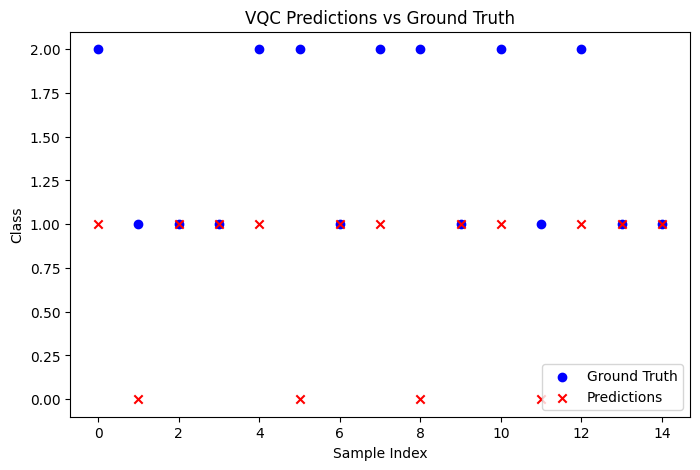

Model Accuracy: 40.00%


In [13]:
# Predict function
def predict(X, params, qubits, simulator):
    predictions = []
    for i in range(len(X)):
        circuit = vqc_circuit(qubits, X[i], params)
        circuit.append(cirq.measure(qubits[-1], key="result"))
        result = simulator.run(circuit, repetitions=10)
        counts = result.histogram(key="result")
        predictions.append(1 if counts.get(1, 0) > counts.get(0, 0) else 0)
    return np.array(predictions)

# Test the model
y_pred = predict(X_test, optimal_params, qubits, simulator)
accuracy = np.mean(y_pred == y_test.values)

# Visualize results
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label="Ground Truth")
plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predictions", marker='x')
plt.title("VQC Predictions vs Ground Truth")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.show()

print(f"Model Accuracy: {accuracy * 100:.2f}%")


## What is the ansatz?

The ansatz is the trainable part of a quantum circuit. It's a parameterized quantum circuit that acts as a "model" for our quantum machine learning task. By adjusting the parameters of the ansatz during training, we try to find an optimal decision boundary for classification.

### How to Modify the Ansatz
1. **Add More Layers**: Adding repeated layers of parameterized gates and entanglement gates increases the circuit's capacity to model complex relationships.
2. **Use Different Parameterized Gates**: Instead of only using `RY`, try adding `RX` or `RZ` gates.
3. **Add More Entanglement**: Use controlled gates like `CZ` or `CNOT` to increase qubit interaction.

Below is the current ansatz and how you can modify it.


In [14]:
# Define a parameterized ansatz (students can experiment here)
def customizable_ansatz(qubits, params, layers=1):
    """
    Args:
    - qubits: List of qubits in the circuit
    - params: List of parameters to be optimized
    - layers: Number of layers in the ansatz

    Returns:
    - A Cirq Circuit object
    """
    circuit = cirq.Circuit()
    idx = 0

    # Create `layers` layers of gates
    for _ in range(layers):
        # Add parameterized single-qubit gates
        for qubit in qubits:
            circuit.append(cirq.ry(params[idx])(qubit))
            circuit.append(cirq.rz(params[idx + 1])(qubit))
            idx += 2

        # Add entanglement between adjacent qubits
        for i in range(len(qubits) - 1):
            circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))

    return circuit


Now, I am going to increase the complxity of the ansatz, and we will notice more computational time, on this google collab CPU runtime.

Experiment with:
- Increasing the number of layers (`layers=2, 3, ...`).
- Using different parameterized gates (`RX`, `RZ`).
- Changing the entanglement pattern (e.g., using `CNOT` gates instead of `CZ`).

Now observe how playing around with the ansatz changes the accuracy of the circuit, below.


In [18]:
# Define qubits and parameters
num_qubits = 4
qubits = [cirq.GridQubit(0, i) for i in range(num_qubits)]

# Increase the number of layers for more complexity
num_layers = 3
num_params = num_qubits * 2 * num_layers
parameters = np.random.rand(num_params)

# Create the circuit with the customizable ansatz
circuit = customizable_ansatz(qubits, parameters, layers=num_layers)

# Visualize the circuit
print("Here is the quantum circuit with our custom ansatz:")
print(circuit)

# Use Cirq's built-in visualization

plt.show()


Here is the quantum circuit with our custom ansatz:
(0, 0): ───Ry(0.297π)───Rz(0.238π)───@───Ry(0.294π)───Rz(0.093π)────────────────@────────────Ry(0.146π)───Rz(0.077π)────────────────@────────────────────
                                     │                                          │                                                   │
(0, 1): ───Ry(0.229π)───Rz(0.302π)───@───@────────────Ry(0.145π)───Rz(0.315π)───@────────────@────────────Ry(0.256π)───Rz(0.025π)───@────────────@───────
                                         │                                                   │                                                   │
(0, 2): ───Ry(0.042π)───Rz(0.166π)───────@────────────@────────────Ry(0.097π)───Rz(0.116π)───@────────────@────────────Ry(0.296π)───Rz(0.231π)───@───@───
                                                      │                                                   │                                          │
(0, 3): ───Ry(0.188π)───Rz(0.144π)────────────────────

##**Assignment 2 for Quantum computing, by 20K-1733.**